#### Fraud Transaction Analysis Project

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\fintech_transactions_10k.csv')

In [4]:
# Quick Check
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      10000 non-null  object 
 1   customer_id         10000 non-null  object 
 2   transaction_date    10000 non-null  object 
 3   transaction_amount  10000 non-null  float64
 4   transaction_type    10000 non-null  object 
 5   merchant_id         10000 non-null  object 
 6   device_type         10000 non-null  object 
 7   location            10000 non-null  object 
 8   channel             10000 non-null  object 
 9   account_balance     10000 non-null  float64
 10  is_fraud            10000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
transaction_type      0
merchant_id           0
device_type           0
location              0
channel               0
account_balance       0
is_fraud              0
dtype: int64

## Feature of Engineering

In [9]:
df['Hour'] = df['transaction_date'].dt.hour

In [10]:
df['Minute'] = df['transaction_date'].dt.minute

In [11]:
df['Day'] = df['transaction_date'].dt.day_name()

In [12]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [13]:
df.columns

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_amount', 'transaction_type', 'merchant_id', 'device_type',
       'location', 'channel', 'account_balance', 'is_fraud', 'Hour', 'Minute',
       'Day'],
      dtype='object')

## Not Necessry Column Drop that also part of Data Cleaning

In [15]:
df

,transaction_id,customer_id,transaction_date,transaction_amount,transaction_type,merchant_id,device_type,location,channel,account_balance,is_fraud,Hour,Minute,Day
0,3b31ac4d-4f6a-4926-9982-dda852a1db7a,CUST49044,2024-11-07 11:14:53.833131,5.05,POS,MER6478,Mobile,Vadodara,UPI,21143.67,0,11,14,Thursday
1,32339b12-a271-4fd8-879c-7e3d45eb691a,CUST74120,2024-11-07 11:30:31.833131,38.45,POS,MER6101,Mobile,Indore,Debit Card,2076.98,0,11,30,Thursday
2,2b5ad00d-dd83-41ef-9e8c-8c9bcbfbc330,CUST82125,2024-11-07 12:13:37.833131,82.64,Online,MER8597,Mobile,Mysuru,Net Banking,19001.74,0,12,13,Thursday
3,1362c3c6-0042-4a82-8c35-56433716350b,CUST33112,2024-11-07 12:51:56.833131,52.23,Online,MER7532,Web,Kolkata,Credit Card,25664.13,0,12,51,Thursday
4,983e67de-96ef-4769-a73d-b9022d35d8e6,CUST34523,2024-11-07 13:25:40.833131,22.33,POS,MER5778,Mobile,Coimbatore,Credit Card,44023.02,0,13,25,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51d86b54-edb7-485f-a18f-8932f75428ca,CUST61267,2025-11-07 08:27:11.833131,49.68,POS,MER6866,Mobile,Jaipur,UPI,47080.71,0,8,27,Friday
9996,eb5fea3e-f15b-4344-9014-57f48f0730ed,CUST89310,2025-11-07 08:37:28.833131,40.85,Transfer,MER8320,Web,Lucknow,Debit Card,20835.50,0,8,37,Friday
9997,62478b70-f412-4e45-9fcb-b8609c1ce391,CUST22074,2025-11-07 09:37:08.833131,30.84,Online,MER9151,Mobile,Hyderabad,Debit Card,35545.13,0,9,37,Friday
9998,cab88ffa-2caa-482f-8bab-57419299fa99,CUST85319,2025-11-07 10:20:16.833131,117.52,Transfer,MER2470,Mobile,Thane,Credit Card,10686.06,0,10,20,Friday


In [16]:
## 1. What is the overall fraud rate?
fraud_rate = df['is_fraud'].mean() * 100
print(f"Overall Fraud Rate: {fraud_rate:.2f}%")

Overall Fraud Rate: 5.78%


<Axes: xlabel='is_fraud', ylabel='count'>

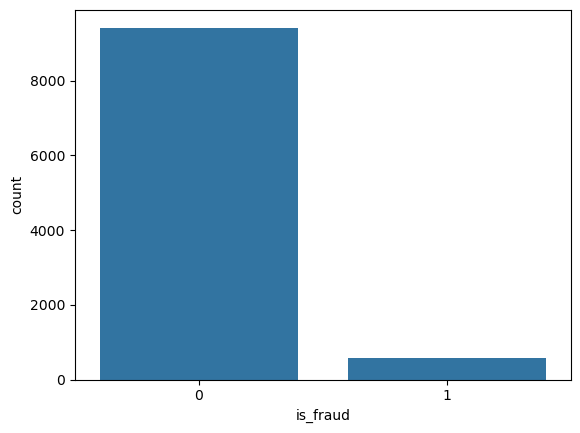

In [17]:
import seaborn as sns
sns.countplot(x='is_fraud', data=df)

In [18]:
## 2. Which transaction types and devices have highest fraud?
fraud_by_type = df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_device = df.groupby('device_type')['is_fraud'].mean().sort_values(ascending=False)

<Axes: title={'center': 'Fraud Rate by Device Type'}, xlabel='device_type'>

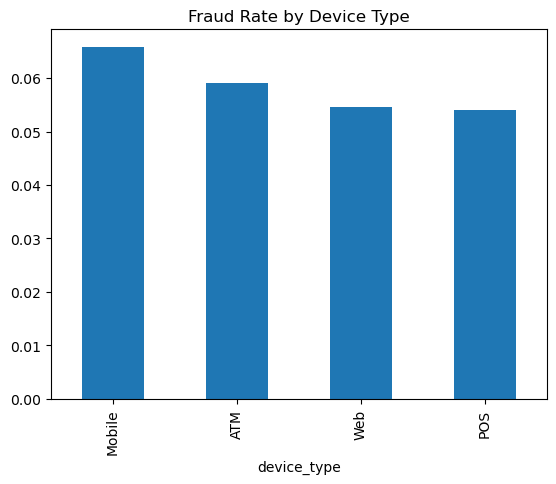

In [19]:
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type')
fraud_by_device.plot(kind='bar', title='Fraud Rate by Device Type')

In [20]:
## 3. What are high-risk customers and locations?
risky_customers = df.groupby('customer_id')['is_fraud'].sum().sort_values(ascending=False).head(10)
risky_locations = df.groupby('location')['is_fraud'].mean().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Risky Locations Type'}, xlabel='location'>

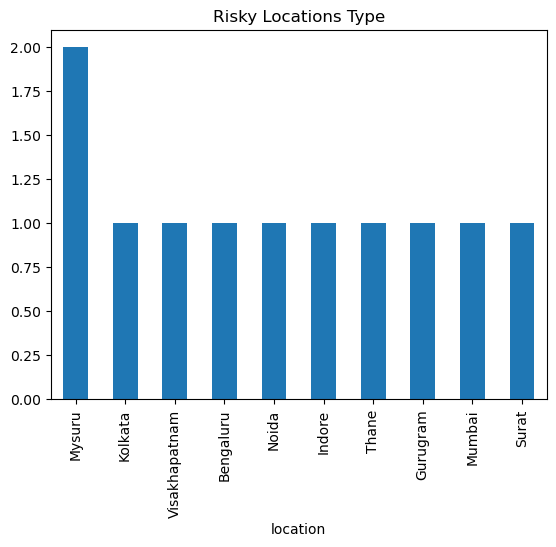

In [21]:
risky_customers.plot(kind='bar', title='Risky Customers Type')
risky_locations.plot(kind='bar', title='Risky Locations Type')

In [40]:
## 4. Are certain times more prone to fraud?
df['hour'] = df['transaction_date'].dt.hour
df['day_of_week'] = df['transaction_date'].dt.day_name()

In [41]:
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()
fraud_by_day = df.groupby('day_of_week')['is_fraud'].mean()

<Axes: title={'center': 'Fraud by Day'}, xlabel='day_of_week'>

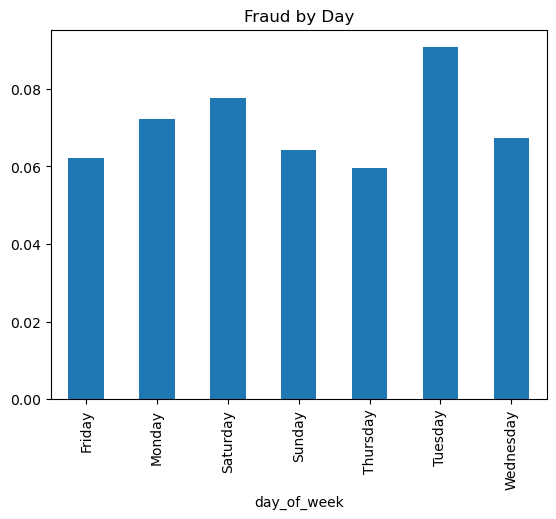

In [42]:
fraud_by_hour.plot(kind='bar', title='Fraud by Hour')
fraud_by_day.plot(kind='bar', title='Fraud by Day')

<Axes: title={'center': 'Fraud Rate by Channel'}, xlabel='channel'>

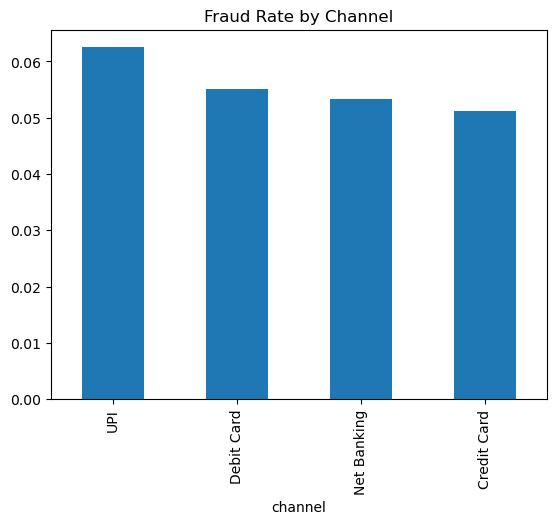

In [25]:
## 5. Which device type or channel is most risky?
fraud_by_channel = df.groupby('channel')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_channel.plot(kind='bar', title='Fraud Rate by Channel')

In [26]:
## 6. Which customers have the most frauds?
top_customers = df[df['is_fraud'] == 1]['customer_id'].value_counts().head(10)

In [27]:
top_customers

customer_id
CUST65770    2
CUST24493    1
CUST17536    1
CUST63799    1
CUST95838    1
CUST43692    1
CUST23814    1
CUST20956    1
CUST28753    1
CUST87094    1
Name: count, dtype: int64

<Axes: title={'center': 'Top Customers'}, xlabel='customer_id'>

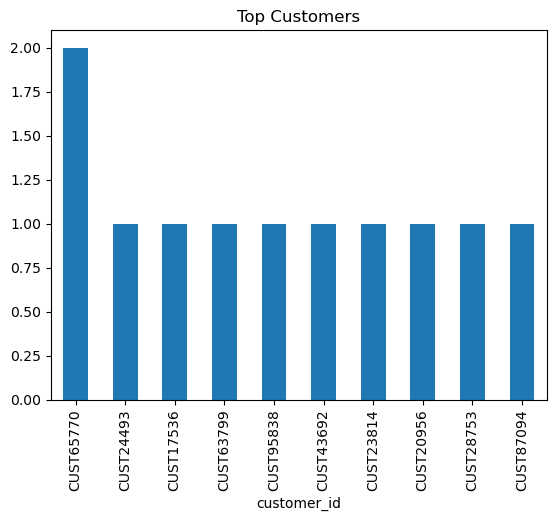

In [28]:
top_customers.plot(kind='bar', title='Top Customers')

In [29]:
## 7. Which merchants or regions have repeated suspicious activity?
top_merchants = df[df['is_fraud'] == 1]['merchant_id'].value_counts().head(10)
top_regions = df.groupby('location')['is_fraud'].sum().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Top Merchants'}, xlabel='merchant_id'>

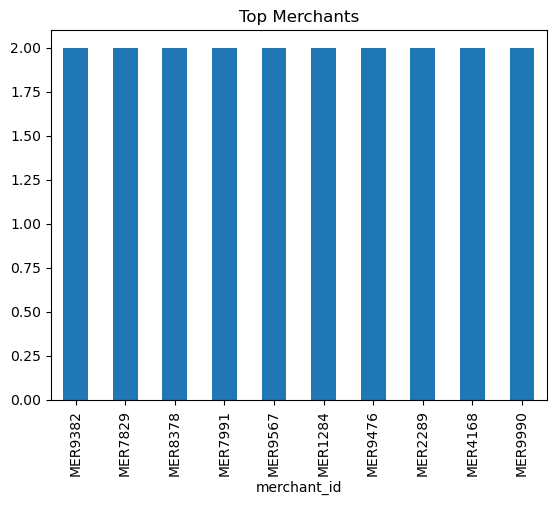

In [30]:
top_merchants.plot(kind='bar', title='Top Merchants')


<Axes: title={'center': 'Top Regions'}, xlabel='location'>

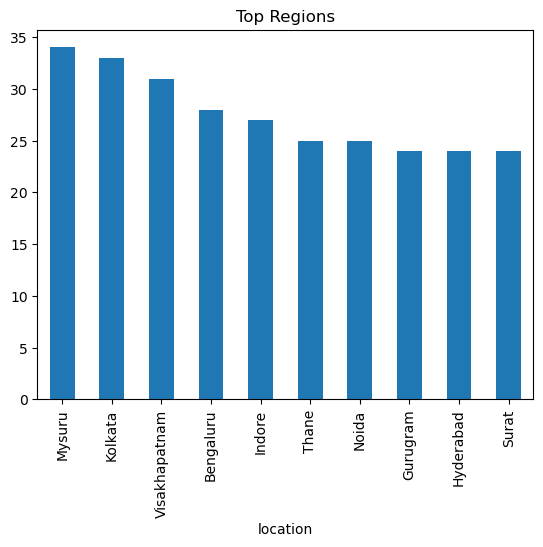

In [31]:
top_regions.plot(kind='bar', title='Top Regions')

<Axes: xlabel='hour', ylabel='is_fraud'>

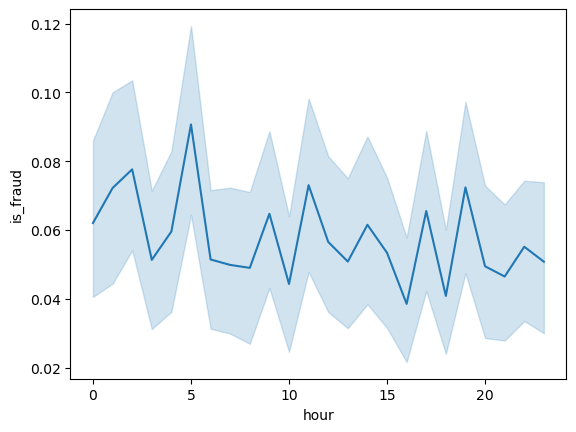

In [32]:
## 8. Is there a specific time/day when fraud occurs most?
sns.lineplot(x='hour', y='is_fraud', data=df, estimator='mean')

<Axes: xlabel='day_of_week', ylabel='is_fraud'>

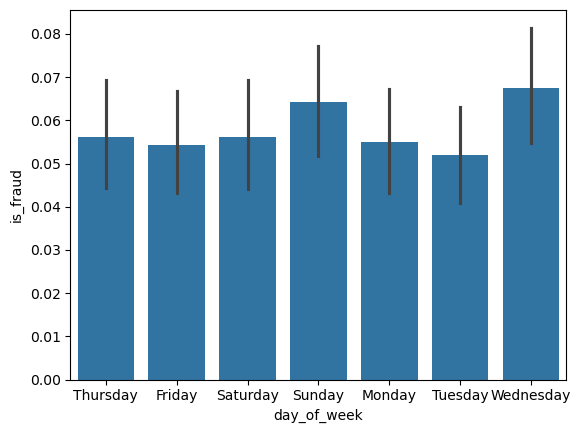

In [33]:
sns.barplot(x='day_of_week', y='is_fraud', data=df)

<Axes: xlabel='is_fraud', ylabel='transaction_amount'>

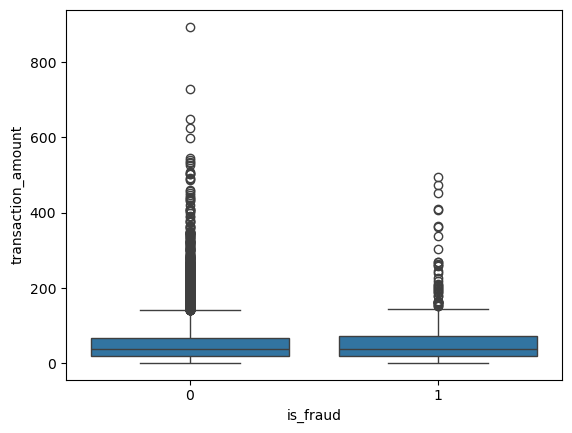

In [34]:
## 9. Are high-value transactions more likely to be fraudulent?
import matplotlib.pyplot as plt

sns.boxplot(x='is_fraud', y='transaction_amount', data=df)

In [35]:
df.groupby('is_fraud')['transaction_amount'].mean()

is_fraud
0    55.695025
1    58.215311
Name: transaction_amount, dtype: float64

In [36]:
## 10. Which locations have the highest fraud density?
fraud_density = df.groupby('location')['is_fraud'].mean().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Fraud Density'}, xlabel='location'>

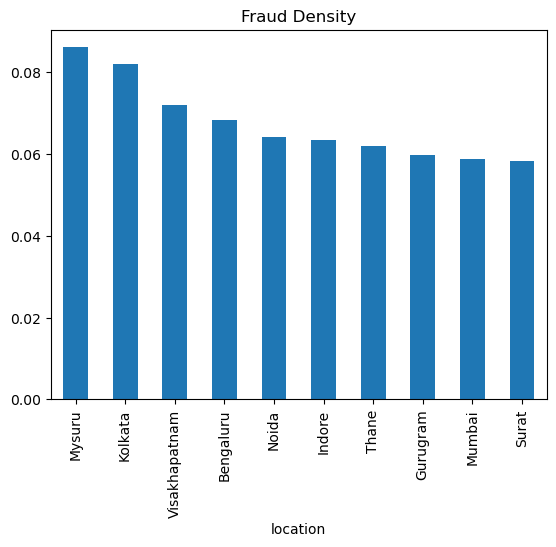

In [37]:
fraud_density.plot(kind='bar', title='Fraud Density')